# EDA for stress levels


In [30]:
#%pip install statsmodels

In [31]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
garmin_base_dir = "../files/Garmin_20241403"

## 22 json files into one dataframe of health data + remove data from before 2020 (no watch)

In [32]:
# Setting up paths and configurations
garmin_base_dir = "../files/Garmin_20241403"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", "DI-Connect-Aggregator")
columns_of_interest = ['calendarDate', 'totalKilocalories', 'activeKilocalories', 'restingCaloriesFromActivity', 
                       'totalSteps', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'userIntensityMinutesGoal', 
                       'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'minAvgHeartRate', 'maxAvgHeartRate',
                       'allDayStress', 'bodyBattery']

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(path, start_year=2020):
    all_dfs = []
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.startswith('UDS') and f.endswith('.json')]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        filtered_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year, columns_of_interest]
        return filtered_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded

# Apply the function and display the resulting DataFrame
focus_df = load_and_filter_json(di_connect_path)
focus_df.head()


,calendarDate,totalKilocalories,activeKilocalories,restingCaloriesFromActivity,totalSteps,moderateIntensityMinutes,vigorousIntensityMinutes,userIntensityMinutesGoal,minHeartRate,maxHeartRate,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,allDayStress,bodyBattery
14,2020-06-18,1923.0,446.0,NaN,13987.0,11.0,0.0,180.0,64.0,128.0,68.0,65.0,121.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2..."
15,2020-06-19,1885.0,408.0,NaN,12455.0,2.0,10.0,180.0,55.0,160.0,64.0,56.0,158.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2..."
16,2020-06-20,2456.0,975.0,NaN,26379.0,20.0,88.0,180.0,53.0,159.0,62.0,54.0,156.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2..."
17,2020-06-21,2202.0,734.0,NaN,12401.0,52.0,4.0,180.0,50.0,139.0,60.0,52.0,134.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2..."
18,2020-06-22,2017.0,549.0,NaN,15256.0,5.0,43.0,180.0,53.0,152.0,60.0,54.0,149.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2..."


In [33]:
focus_df[['allDayStress']].iat[0,0]['aggregatorList']
#focus_df[['bodyBattery']].iat[0,0]['bodyBatteryStatList']

[{'type': 'TOTAL',
  'averageStressLevel': 40,
  'averageStressLevelIntensity': 35,
  'maxStressLevel': 93,
  'stressIntensityCount': 376,
  'stressOffWristCount': 148,
  'stressTooActiveCount': 253,
  'totalStressCount': 777,
  'totalStressIntensity': -5086,
  'stressDuration': 15480,
  'restDuration': 7080,
  'activityDuration': 15180,
  'uncategorizedDuration': 8880,
  'totalDuration': 46620,
  'lowDuration': 7680,
  'mediumDuration': 7020,
  'highDuration': 780},
 {'type': 'AWAKE',
  'averageStressLevel': 40,
  'averageStressLevelIntensity': 35,
  'maxStressLevel': 93,
  'stressIntensityCount': 369,
  'stressOffWristCount': 119,
  'stressTooActiveCount': 253,
  'totalStressCount': 741,
  'totalStressIntensity': -5035,
  'stressDuration': 15120,
  'restDuration': 7020,
  'activityDuration': 15180,
  'uncategorizedDuration': 7140,
  'totalDuration': 44460,
  'lowDuration': 7320,
  'mediumDuration': 7020,
  'highDuration': 780},
 {'type': 'ASLEEP',
  'averageStressLevel': 31,
  'avera

In [34]:
def extract_stress_data(row):
    if isinstance(row, list) and row:  # Check if it's a list and not empty
        first_dict = row[0]  # Assuming you want the first dictionary
        return pd.Series({
            'AverageStressLevel': first_dict.get('averageStressLevel', None),
            'MaxStressLevel': first_dict.get('maxStressLevel', None)
        })
    else:
        return pd.Series({'AverageStressLevel': None, 'MaxStressLevel': None})


In [35]:
focus_df[['allDayStress']].iat[0,0]

{'userProfilePK': 86607424,
 'calendarDate': '2020-06-18',
 'aggregatorList': [{'type': 'TOTAL',
   'averageStressLevel': 40,
   'averageStressLevelIntensity': 35,
   'maxStressLevel': 93,
   'stressIntensityCount': 376,
   'stressOffWristCount': 148,
   'stressTooActiveCount': 253,
   'totalStressCount': 777,
   'totalStressIntensity': -5086,
   'stressDuration': 15480,
   'restDuration': 7080,
   'activityDuration': 15180,
   'uncategorizedDuration': 8880,
   'totalDuration': 46620,
   'lowDuration': 7680,
   'mediumDuration': 7020,
   'highDuration': 780},
  {'type': 'AWAKE',
   'averageStressLevel': 40,
   'averageStressLevelIntensity': 35,
   'maxStressLevel': 93,
   'stressIntensityCount': 369,
   'stressOffWristCount': 119,
   'stressTooActiveCount': 253,
   'totalStressCount': 741,
   'totalStressIntensity': -5035,
   'stressDuration': 15120,
   'restDuration': 7020,
   'activityDuration': 15180,
   'uncategorizedDuration': 7140,
   'totalDuration': 44460,
   'lowDuration': 732

In [36]:
import pandas as pd

def extract_stress_data(row):
    # Accessing the list of stress data segments
    aggregator_list = row.get('aggregatorList', [])
    
    # Find the dictionary in the list where 'type' is 'TOTAL'
    total_stress_data = next((item for item in aggregator_list if item['type'] == 'TOTAL'), None)
    
    # If found, extract the required data
    if total_stress_data:
        return pd.Series({
            'AverageStressLevel': total_stress_data.get('averageStressLevel', None),
            'MaxStressLevel': total_stress_data.get('maxStressLevel', None)
        })
    else:
        return pd.Series({'AverageStressLevel': None, 'MaxStressLevel': None})

# Apply the function to each row in the 'allDayStress' column
stress_metrics = focus_df['allDayStress'].apply(extract_stress_data)
focus_df = pd.concat([focus_df, stress_metrics], axis=1)


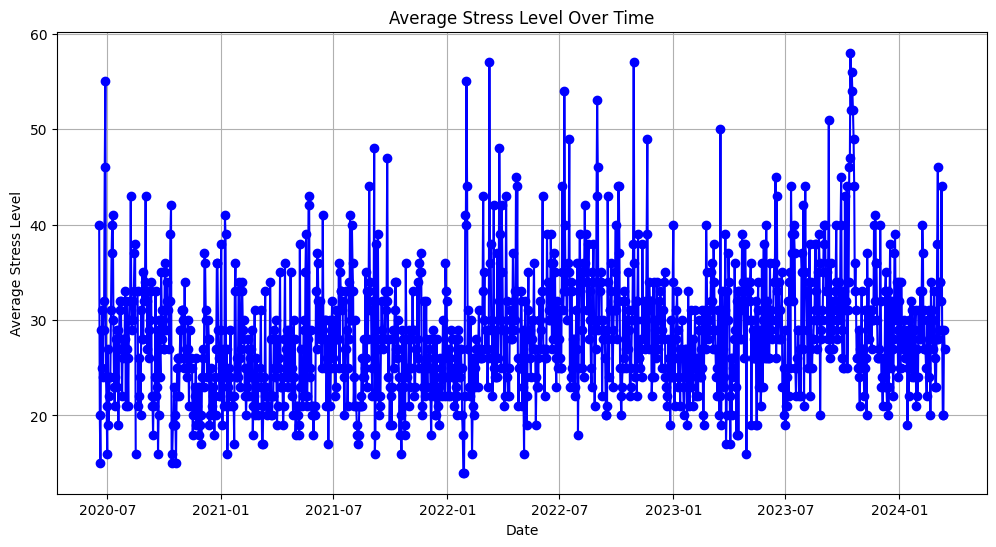

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(focus_df['calendarDate'], focus_df['AverageStressLevel'], marker='o', linestyle='-', color='b')
plt.title('Average Stress Level Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stress Level')
plt.grid(True)
plt.show()


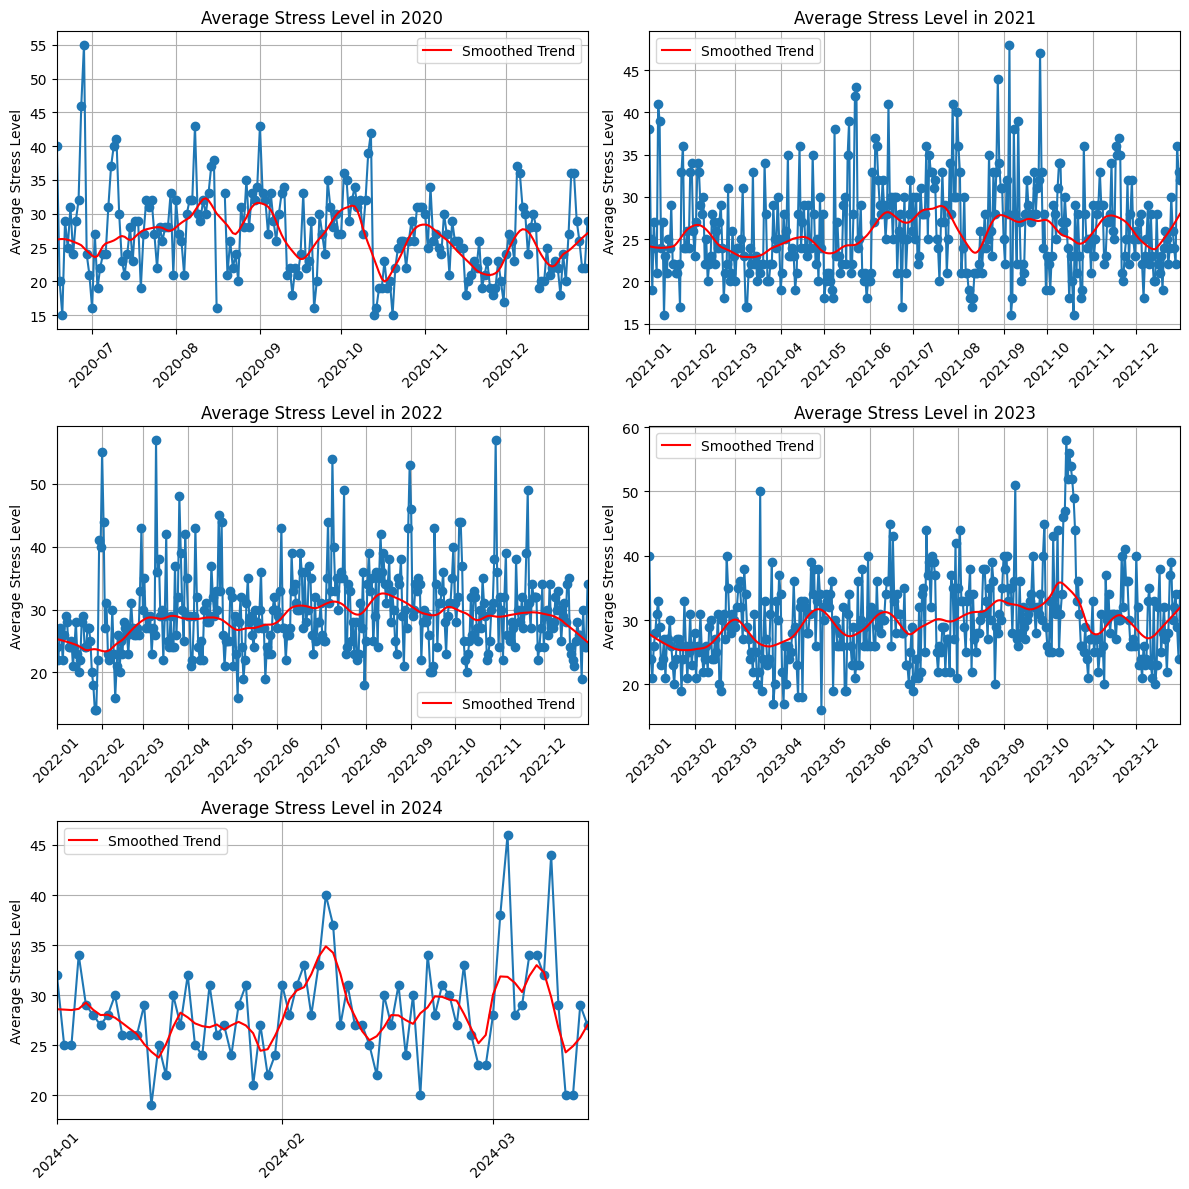

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates  # Import the dates module from matplotlib

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already
focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
rows = (len(years) + 1) // 2
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 4 * rows))
axes = axes.ravel()

# Plot each year's data
for i, year in enumerate(years):
    ax = axes[i]
    year_data = focus_df[focus_df['year'] == year]
    
    # Plot raw data as a line plot
    ax.plot(year_data['calendarDate'], year_data['AverageStressLevel'], marker='o', linestyle='-')
    
    # Ensure that the calendarDate is converted to numeric for lowess smoothing
    numeric_dates = mdates.date2num(year_data['calendarDate'])  # Convert dates to numeric format using matplotlib.dates
    
    # Lowess smoothing
    smoothed = lowess(year_data['AverageStressLevel'], numeric_dates, frac=0.1)
    ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
    
    ax.set_title(f"Average Stress Level in {year}")
    ax.set_ylabel('Average Stress Level')
    ax.grid(True)

    ax.set_xlim([year_data['calendarDate'].min(), year_data['calendarDate'].max()])

    # Set x-axis major locator to month starts and formatter to year-month format
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    ax.legend()

# Hide any unused subplot axes if the number of plots is odd
if len(years) % 2 != 0:
    axes[-1].axis('off')
    
plt.tight_layout()
plt.show()


## Stress and trend in 2021-2023

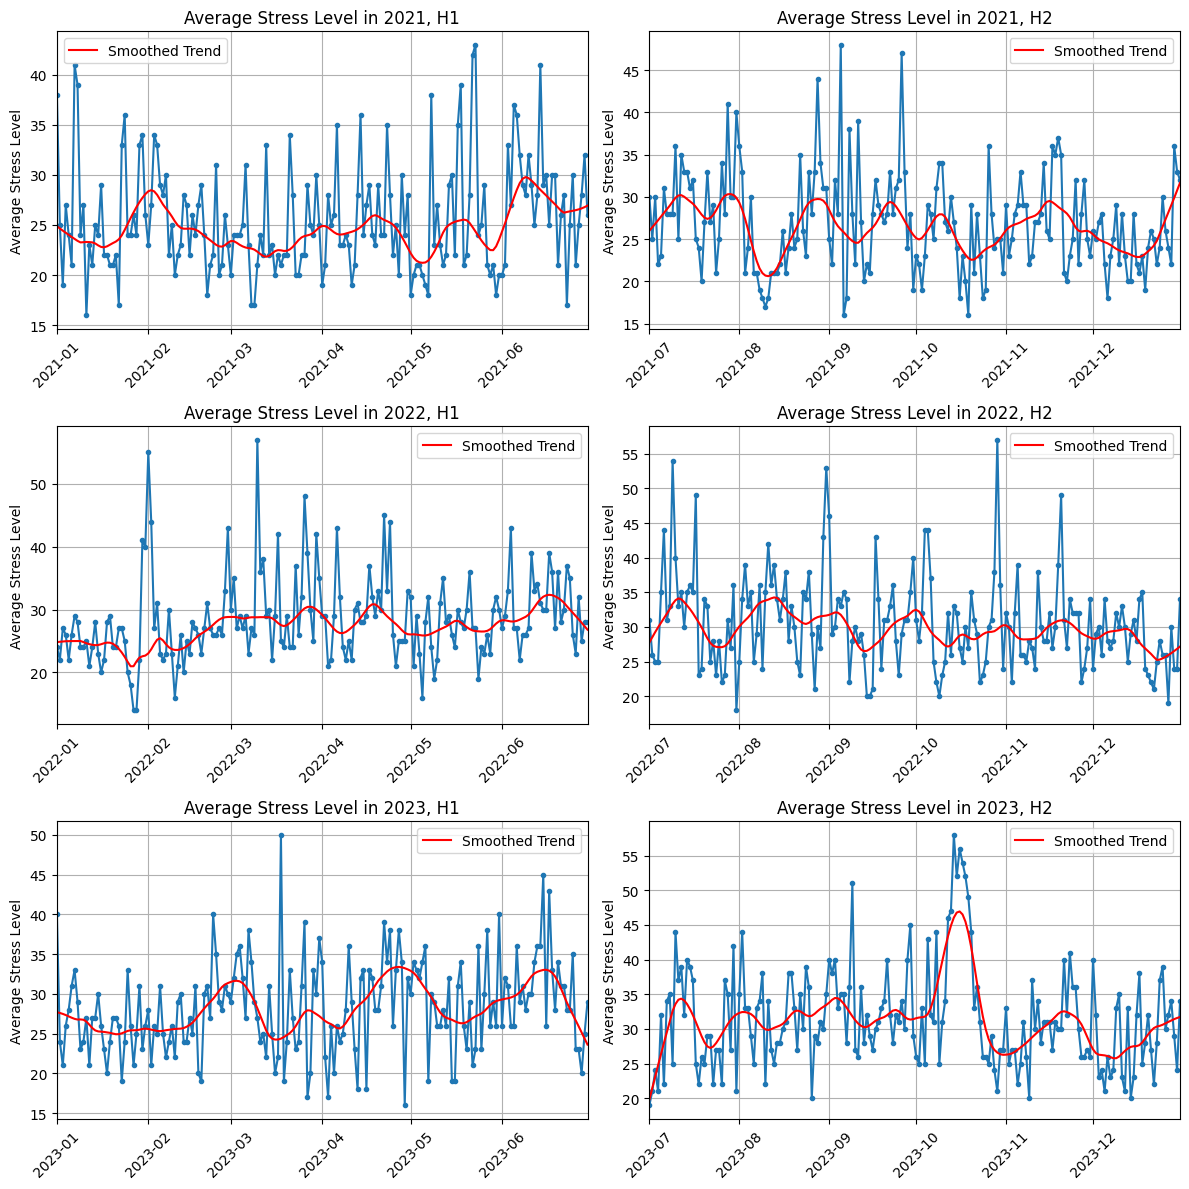

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
focus_df = focus_df[focus_df['calendarDate'] >= '2021-01-01']  
focus_df = focus_df[focus_df['calendarDate'] <= '2023-12-31']  

focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping
focus_df['half'] = (focus_df['calendarDate'].dt.month - 1) // 6 + 1  # Determine the half of the year

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = focus_df[(focus_df['year'] == year) & (focus_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['AverageStressLevel'], marker='.', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['AverageStressLevel'], numeric_dates, frac=0.1)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Average Stress Level in {year}, H{half}")
            ax.set_ylabel('Average Stress Level')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()


### ChatGPT suggestion on how to anayze trends in stress levels

Analyzing the trends in your stress levels over the years 2021 to 2023 to identify specific periods for further investigation can be approached both visually and numerically. Here are some numerical approaches you might consider to analyze the trends and detect periods of significant changes or high stress levels:

1. **Rolling Average (Moving Average)**

A rolling or moving average helps smooth out short-term fluctuations and highlight longer-term trends or cycles. You can calculate rolling averages for different windows (e.g., a 7-day or 30-day moving average) depending on the granularity of your data and the kind of trends you're interested in observing.

2. **Change Points Detection**
    
Change point detection involves identifying points where the statistical properties of a sequence of observations change significantly. This can be particularly useful for spotting when your stress levels shift dramatically, signaling a change in your underlying stress factors.


3. **Time Series Decomposition**
    
Decomposing the time series can help you understand underlying patterns such as trend, seasonality, and residuals. Libraries like statsmodels in Python can be used to perform this decomposition, giving insights into the underlying trends and periodic variations in your stress levels.


4. **Anomaly Detection**
    
Anomaly detection algorithms can identify outliers or unusual data points that differ significantly from the rest of the data. Identifying these points can help focus on specific days or periods with unusually high or low stress levels compared to your typical patterns.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt  # Correct import for the ruptures package

# Sample DataFrame setup
data = {
    'Date': pd.date_range(start="2021-01-01", periods=1095, freq='D'),
    'StressLevel': np.random.normal(loc=5, scale=2, size=1095)  # Simulated stress levels
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate a 30-day rolling average
df['RollingMean'] = df['StressLevel'].rolling(window=90).mean()

# Plotting the stress levels and the rolling average
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['StressLevel'], label='Daily Stress Level')
plt.plot(df.index, df['RollingMean'], label='60-Day Rolling Average', color='red')
plt.title('Stress Level Trends 2021-2023')
plt.legend()
plt.show()

# Change point detection using ruptures
model = "l1"  # Using L1 norm
penalty = 8

algo = rpt.Pelt(model=model, min_size=1, jump=1).fit(df['StressLevel'].values)
change_points = algo.predict(pen=penalty)

# Filter out change point that exceeds the length of the DataFrame
change_points = [cp for cp in change_points if cp < len(df)]

# Highlighting change points on the plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['StressLevel'], label='Daily Stress Level')
for cp in change_points:
    plt.axvline(df.index[cp], color='r', linestyle='--', label='Change Point' if cp == change_points[0] else None)
plt.title('Detected Change Points in Stress Levels')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'ruptures'

## Anomaly Detection
For anomaly detection, you can use various statistical methods or machine learning models. A simple and effective approach is using the Interquartile Range (IQR) method, which identifies outliers based on quartiles.

IQR-based Anomaly Detection
Calculate the IQR (the difference between the 75th and 25th percentiles).
Identify outliers as those points that fall below 
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR or above 
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with a 'StressLevel' column
Q1 = df['StressLevel'].quantile(0.25)
Q3 = df['StressLevel'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = df[(df['StressLevel'] < (Q1 - 1.5 * IQR)) | (df['StressLevel'] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR:")
print(outliers)


### Statistical Analysis for Trends
For numerical statistical analysis to understand trends in your stress levels, you can use techniques such as:

Linear Regression: To see if there is a statistically significant trend over time.
Seasonal Decomposition: To extract and analyze trends, seasonality, and residuals.


In [ ]:
from scipy.stats import linregress

# Assuming df['Date'] is your index and is in datetime format
df['Time'] = range(len(df))  # Time as a simple numerical feature for regression

slope, intercept, r_value, p_value, std_err = linregress(df['Time'], df['StressLevel'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}") 
print(f"R-squared: {r_value**2}") 
print(f"P-value: {p_value}")


## Claus

Print restingHeartRate, minAvgHeartRate	and maxAvgHeartRate as 	

### restingHeartRate

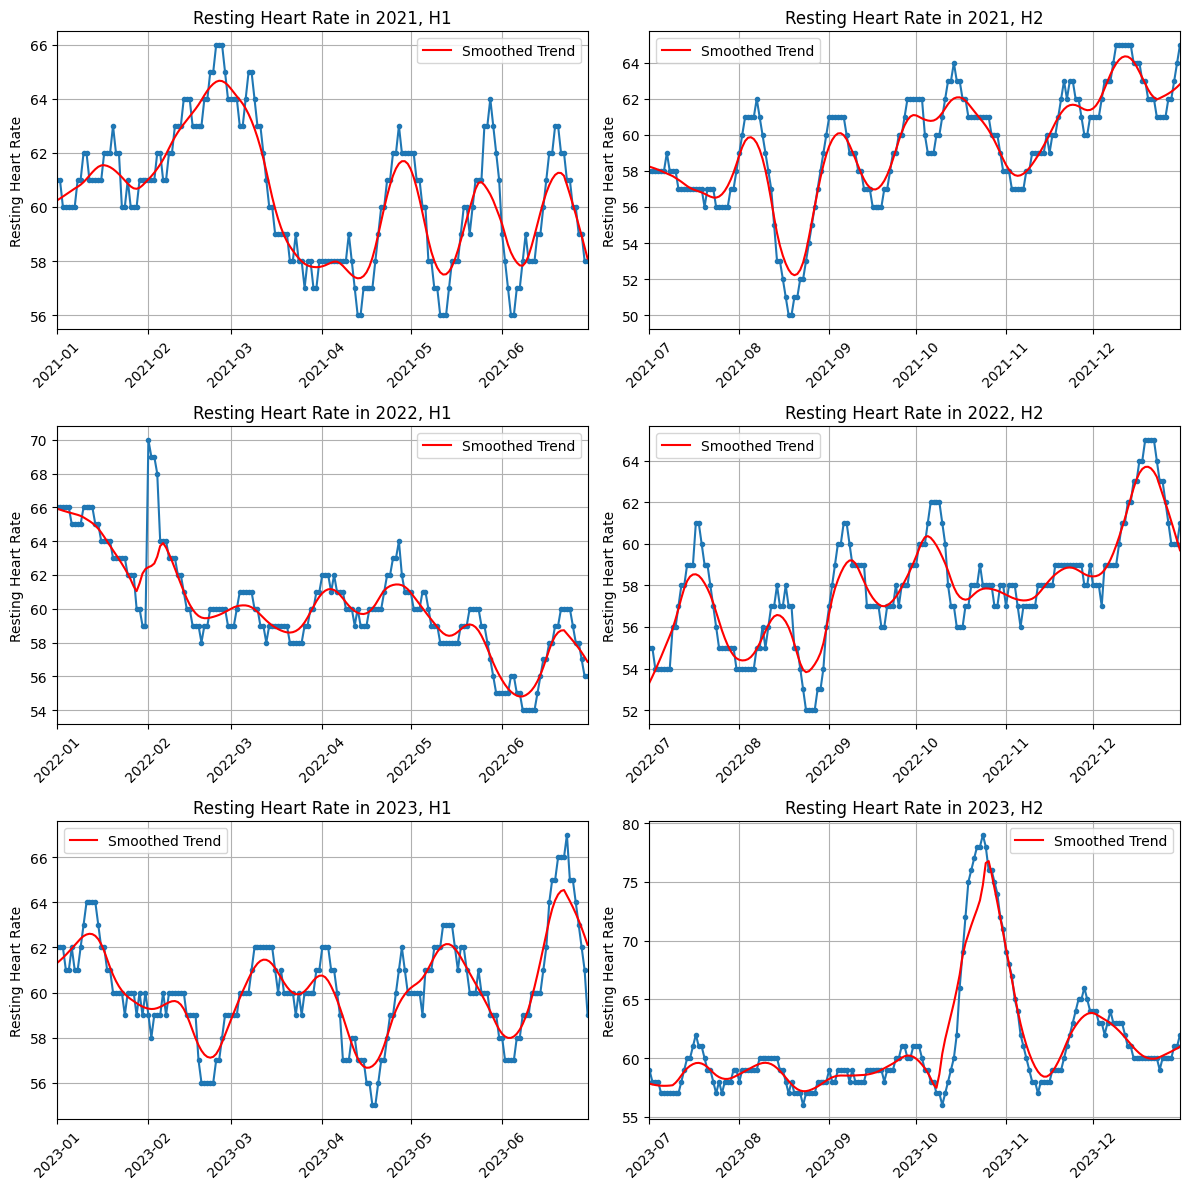

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
focus_df = focus_df[focus_df['calendarDate'] >= '2021-01-01']  
focus_df = focus_df[focus_df['calendarDate'] <= '2023-12-31']  

focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping
focus_df['half'] = (focus_df['calendarDate'].dt.month - 1) // 6 + 1  # Determine the half of the year

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = focus_df[(focus_df['year'] == year) & (focus_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['restingHeartRate'], marker='.', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['restingHeartRate'], numeric_dates, frac=0.1)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Resting Heart Rate in {year}, H{half}")
            ax.set_ylabel('Resting Heart Rate')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()


### minAvgHeartRate

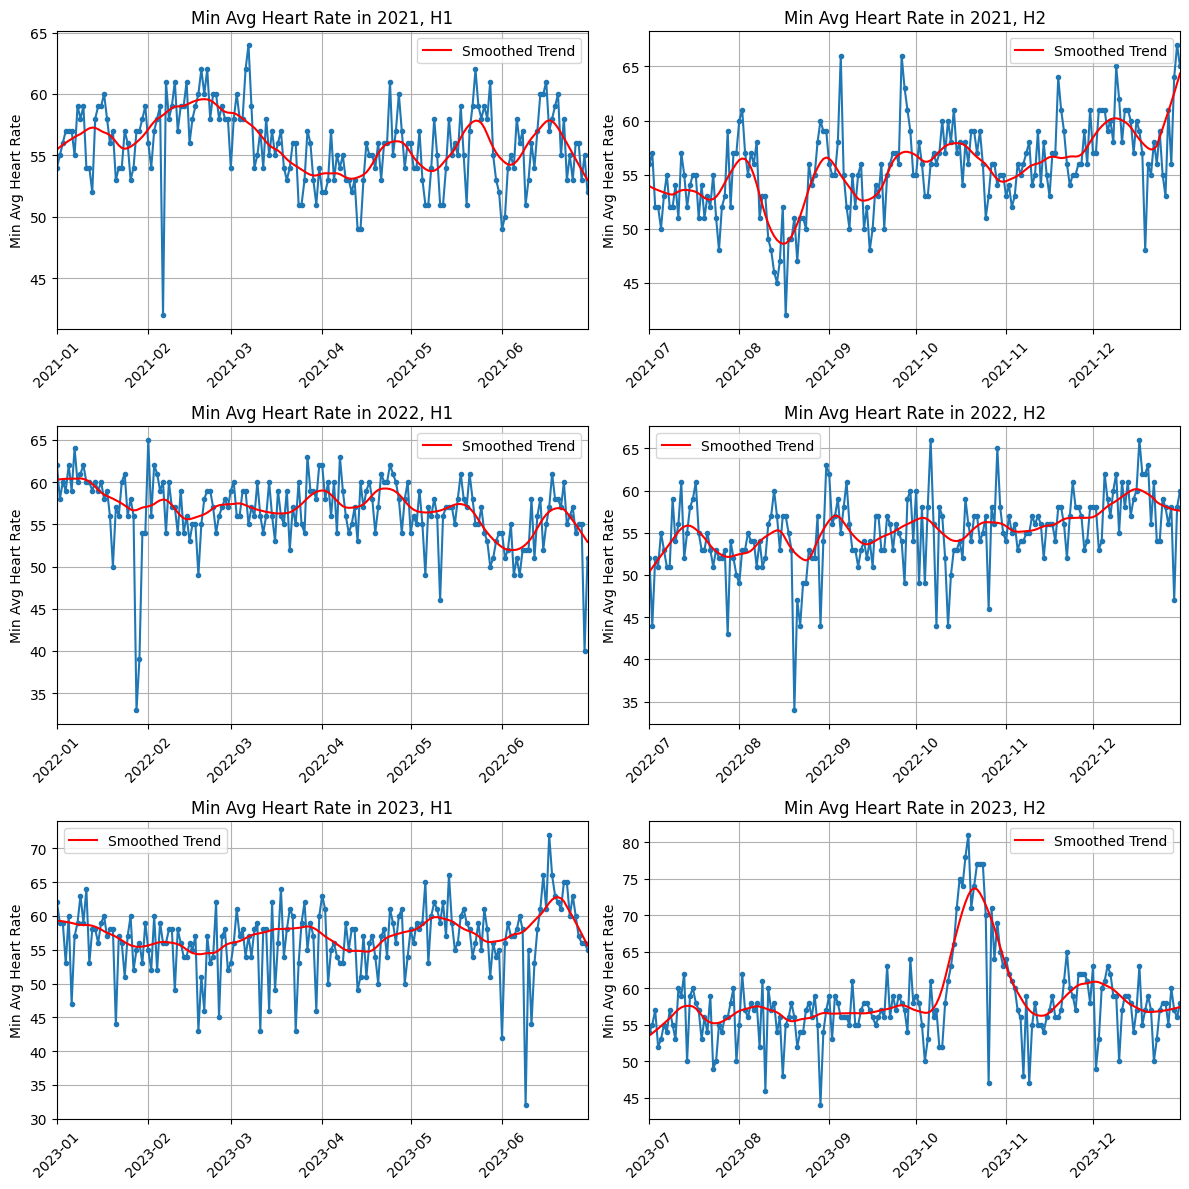

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
focus_df = focus_df[focus_df['calendarDate'] >= '2021-01-01']  
focus_df = focus_df[focus_df['calendarDate'] <= '2023-12-31']  

focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping
focus_df['half'] = (focus_df['calendarDate'].dt.month - 1) // 6 + 1  # Determine the half of the year

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = focus_df[(focus_df['year'] == year) & (focus_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['minAvgHeartRate'], marker='.', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['minAvgHeartRate'], numeric_dates, frac=0.1)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Min Avg Heart Rate in {year}, H{half}")
            ax.set_ylabel('Min Avg Heart Rate')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()


### maxAvgHeartRate

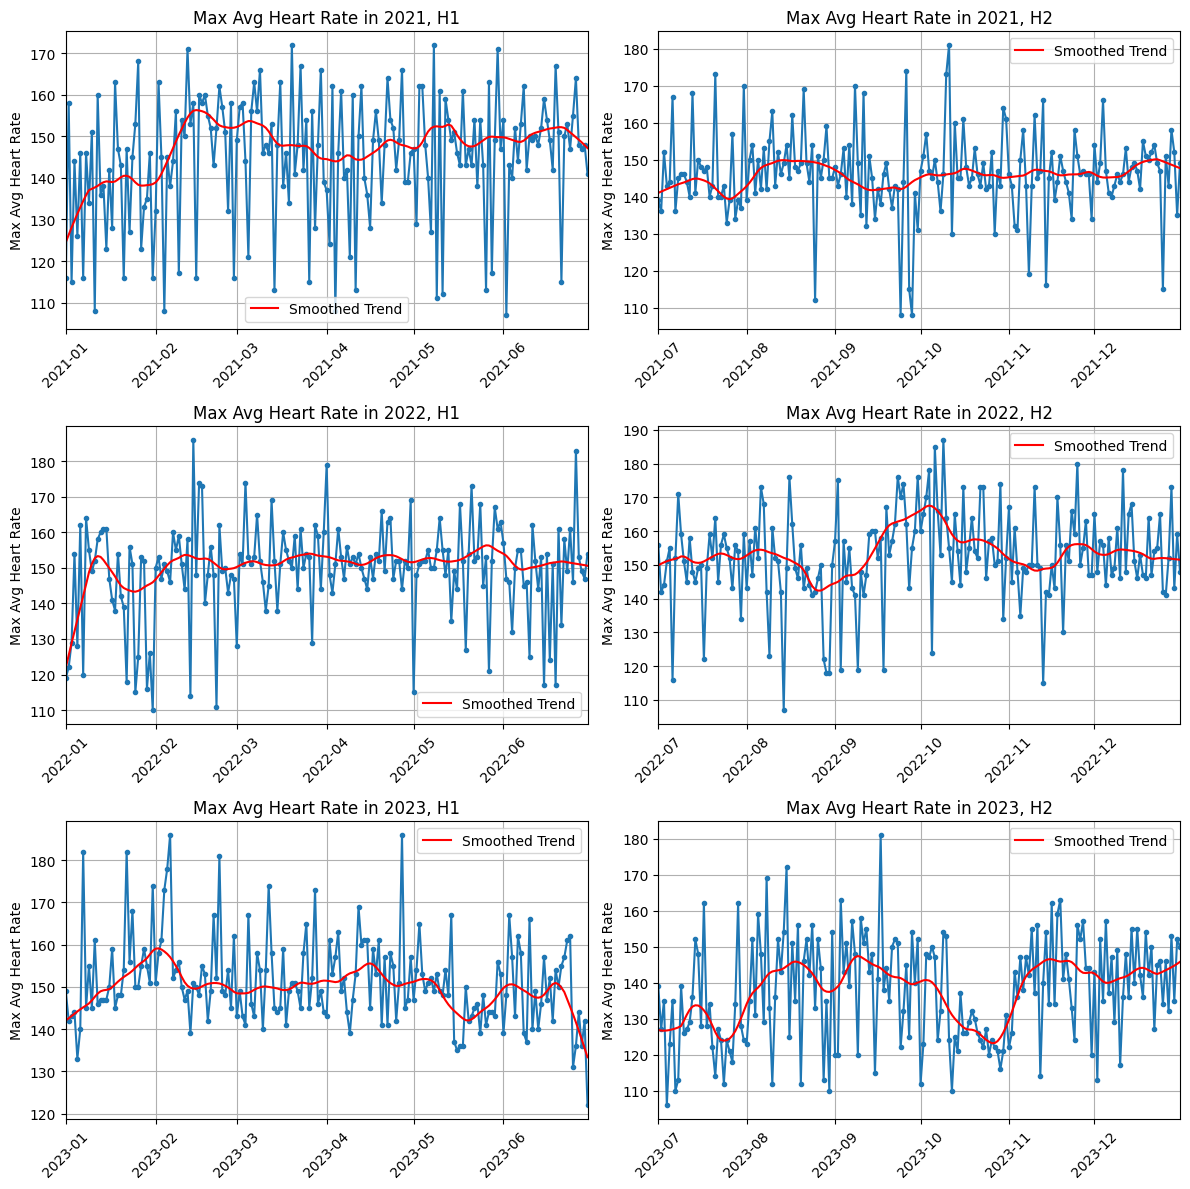

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
focus_df = focus_df[focus_df['calendarDate'] >= '2021-01-01']  
focus_df = focus_df[focus_df['calendarDate'] <= '2023-12-31']  

focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping
focus_df['half'] = (focus_df['calendarDate'].dt.month - 1) // 6 + 1  # Determine the half of the year

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = focus_df[(focus_df['year'] == year) & (focus_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['maxAvgHeartRate'], marker='.', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['maxAvgHeartRate'], numeric_dates, frac=0.1)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Max Avg Heart Rate in {year}, H{half}")
            ax.set_ylabel('Max Avg Heart Rate')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()
